# Basic Classification

## Import

In [1]:
# Tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print(tf.__version__)

1.10.0


## Import the dataset

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [4]:
print("train images : {shape}".format(shape=train_images.shape))
print("train labels : {shape}\n".format(shape=train_labels.shape))
print("test images  : {shape}".format(shape=test_images.shape))
print("test labels  : {shape}\n".format(shape=test_labels.shape))

train images : (60000, 28, 28)
train labels : (60000,)

test images  : (10000, 28, 28)
test labels  : (10000,)



In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Preprocess the data

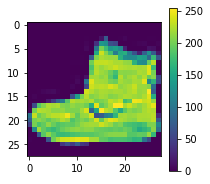

In [6]:
plt.figure(figsize=(3,3))
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
train_images = train_images/255
test_images = test_images/255

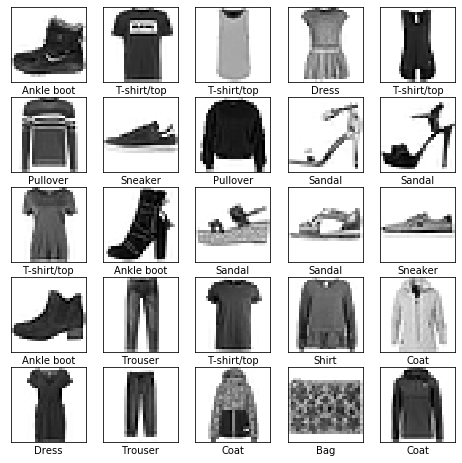

In [8]:
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    plt.xticks([]);plt.yticks([]);plt.grid(False)
plt.show()
    

## Build the model

In [10]:
model = keras.Sequential([
    # from a 2d-array (of 28 by 28 pixels), to a 1d-array of 28 * 28 = 784 pixels.
    keras.layers.Flatten(input_shape=(28, 28)),
    
    # These are densely-connected, or fully-connected, neural layers.
    # The first Dense layer has 128 nodes (or neurons).
    keras.layers.Dense(128, activation=tf.nn.relu),
    # The second (and last) layer is a 10-node softmax layer—this returns an array of 10 probability scores that sum to 1
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

## Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

* **Loss function** : 
    * This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
* **Optimizer** :
    * This is how the model is updated based on the data it sees and its loss function.
* **Metrics** :
    * Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model

In [13]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 143s 2ms/step - loss: 0.5003 - acc: 0.8247
Epoch 2/5
60000/60000 [==============================] - 7s 110us/step - loss: 0.3813 - acc: 0.8621
Epoch 3/5
60000/60000 [==============================] - 7s 110us/step - loss: 0.3392 - acc: 0.8758
Epoch 4/5
60000/60000 [==============================] - 7s 111us/step - loss: 0.3148 - acc: 0.8848
Epoch 5/5
60000/60000 [==============================] - 7s 110us/step - loss: 0.2993 - acc: 0.8897


## Evaluate accuracy

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 2s 151us/step
Test accuracy: 0.8728


## Make predictions

In [15]:
predictions = model.predict(test_images)

In [21]:
# returns an array of 10 probability scores that sum to 1
print("Prediction shape : {shape}".format(shape=predictions.shape))
predictions[0]

Prediction shape : (10000, 10)


array([8.4925006e-07, 9.8645030e-09, 6.6458011e-07, 1.1374180e-07,
       9.1385516e-07, 8.9804390e-03, 1.1004370e-07, 1.3749202e-02,
       1.0917219e-06, 9.7726655e-01], dtype=float32)

In [22]:
# 去找 0~9 中 prediction 最高的那一個
np.argmax(predictions[0])

9